# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [4]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Заполняем пропуски:

In [7]:
# В разных классах были пассажиры разного возраста. Заполним пропуски 'Age',
# относительно среднего возраста по полу и классу.

titanic['Age'].fillna(titanic.groupby(['Sex', 'Pclass'])['Age'].transform('median'), inplace=True)

In [8]:
# Поскольку у «Embarked» было только два пропущенных значения и наибольшее количество пассажиров 
# отправлялось из Southampton, вероятность посадки в Southampton выше. Заполняем модой.
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [9]:
# Пропуски в номерах кают заполняем 'no_info'. Столбец с номером каюты, не несет полезной информации 
# и в возможно в дальнейшем будут удален

titanic['Cabin'].fillna('no_info', inplace=True)

In [10]:
titanic.head(60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,no_info,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,no_info,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,no_info,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,no_info,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,no_info,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,no_info,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,no_info,C


In [11]:
# sns.set_style('whitegrid')

In [309]:
# sns.pairplot(titanic, hue="Survived")

Text(0.5, 1.0, 'Распределение пассажиров по возрасту')

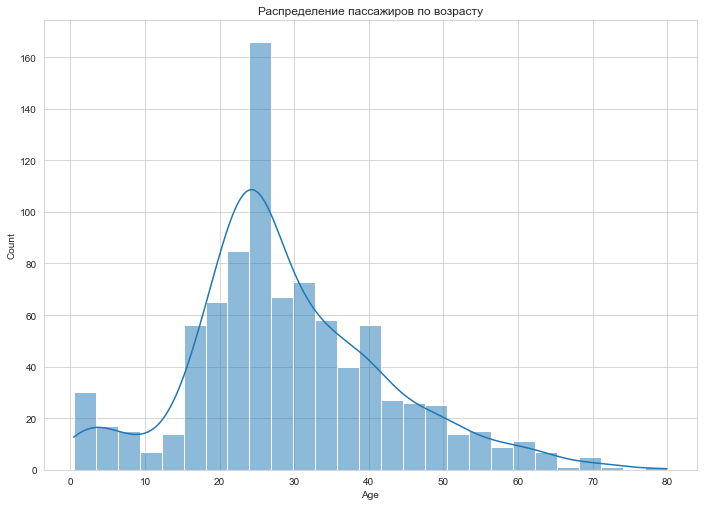

In [310]:
sns.histplot(titanic['Age'], kde=True)
plt.title('Распределение пассажиров по возрасту')

<AxesSubplot:xlabel='Age', ylabel='Count'>

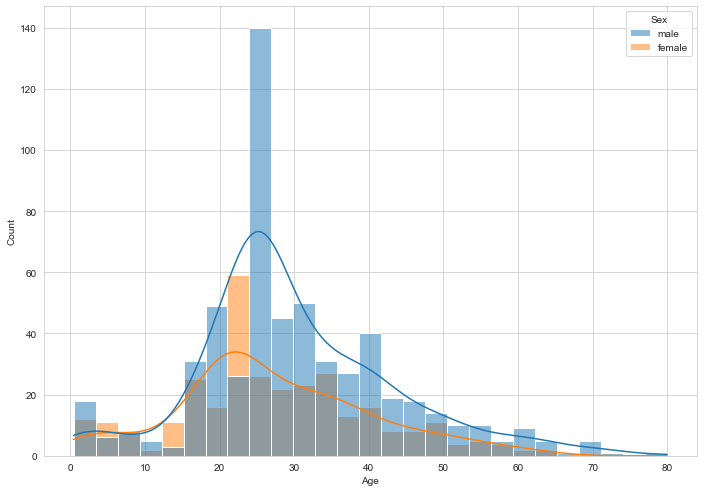

In [311]:
sns.histplot(x=titanic['Age'], hue=titanic['Sex'],  kde=True)

In [312]:
# Из распределения пассаижиров по возрасту видно, что людей возраста 26-27 лет на Титанике, было больше всего.

Text(0.5, 1.0, 'Распределение пассажиров по возрасту и по классу ')

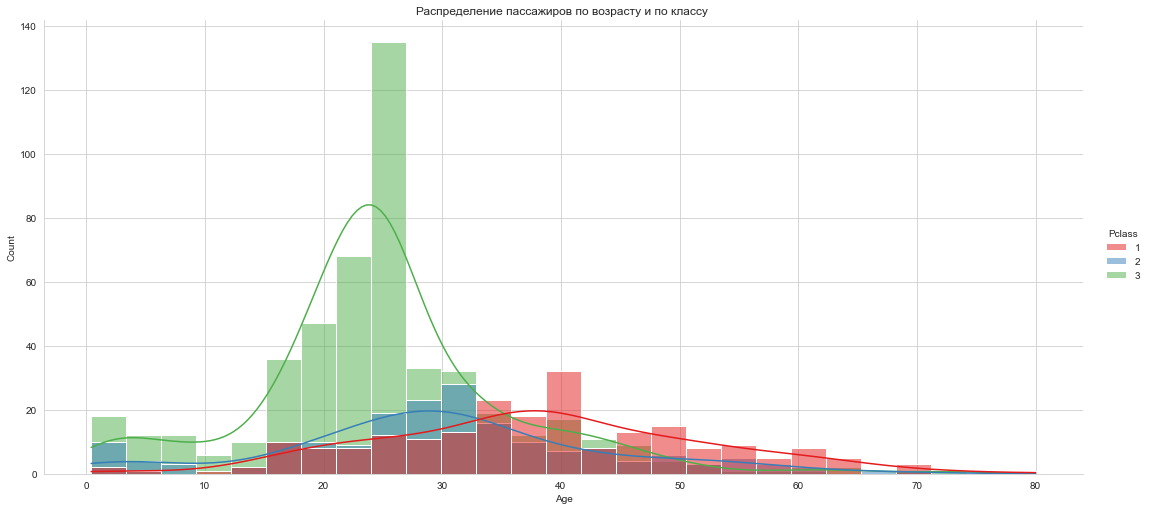

In [313]:
sns.displot(x=titanic['Age'], hue=titanic['Pclass'], palette='Set1', height=7, aspect=11/5, kde=True)
plt.title('Распределение пассажиров по возрасту и по классу ')

In [314]:
# Из распределения пассаижиров по классу и возрасту видно, что сымые молодые пассажиры 3го класса. 
# Это в связано с желанием молодых людей начать новую жизнь в Америке.
# Чем старше человек — тем его благосостояние выше и выше уровень комфорта.

Text(0.5, 0, 'Пол')

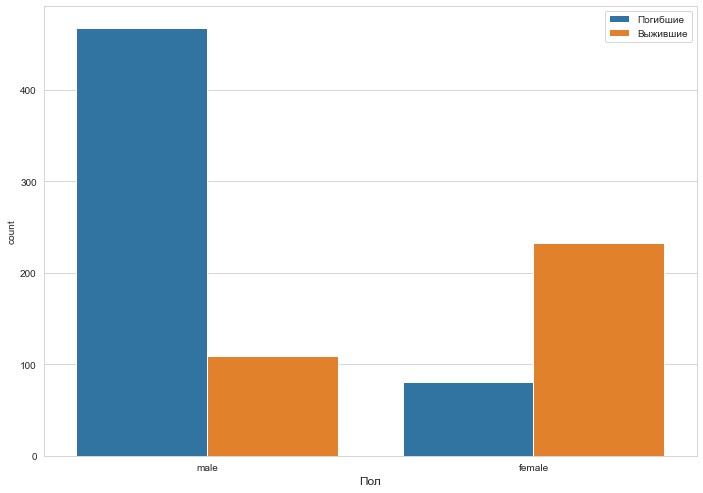

In [315]:
cp = sns.countplot(x=titanic.Sex, hue=titanic.Survived)
plt.legend(("Погибшие", "Выжившие"))
cp.set_xlabel("Пол", fontsize=12)


<AxesSubplot:xlabel='Pclass', ylabel='count'>

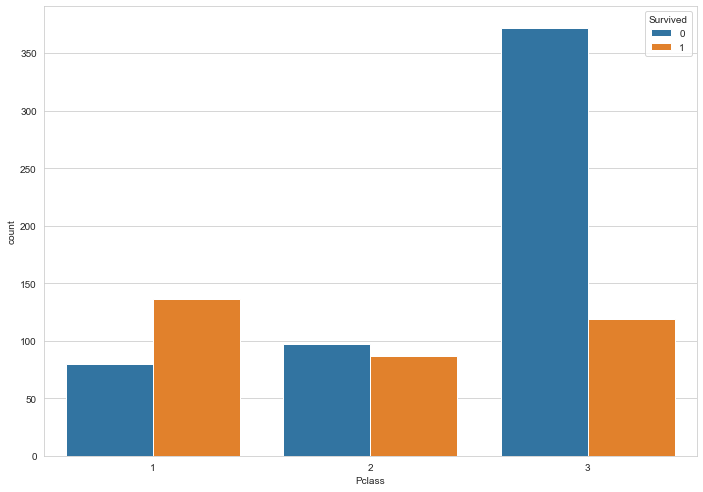

In [316]:

# sns.set_style('whitegrid')
sns.countplot(x='Pclass', hue='Survived', data=titanic)

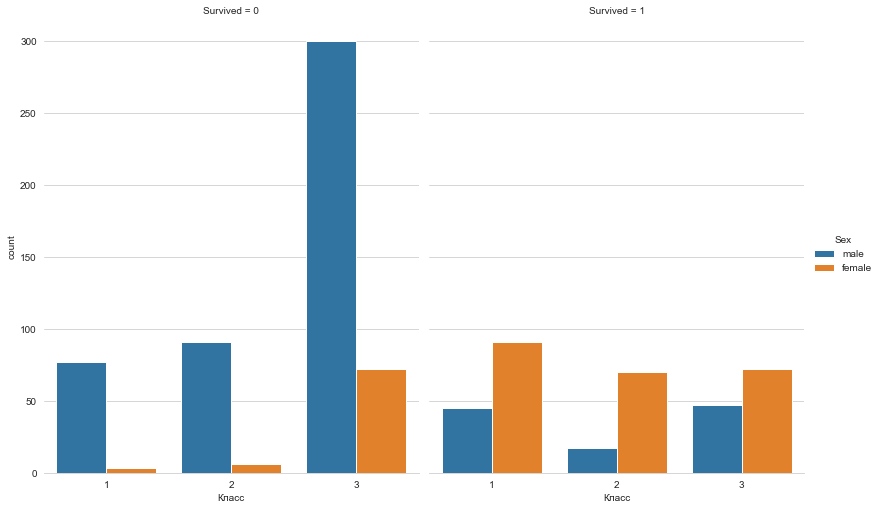

In [317]:
catp = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=titanic, kind="count",
                height=7, aspect=.8)
(catp.set_axis_labels("Класс")
#   .set_yticklabels(["Men", "Women"])
#   .set_titles("{col_name} {col_var}")
#   .set(ylim=(0, 1))
  .despine(left=True))

Text(0, 0.5, 'Возраст')

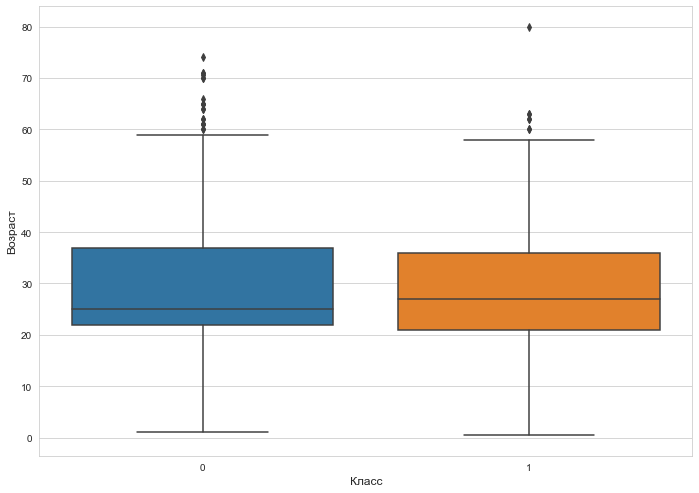

In [318]:
bp = sns.boxplot(x="Survived", y="Age", data=titanic)
bp.set_xlabel("Класс", fontsize=12)
bp.set_ylabel("Возраст", fontsize=12)

Text(0.5, 1.0, 'Training Data - Survival based on embarking point.')

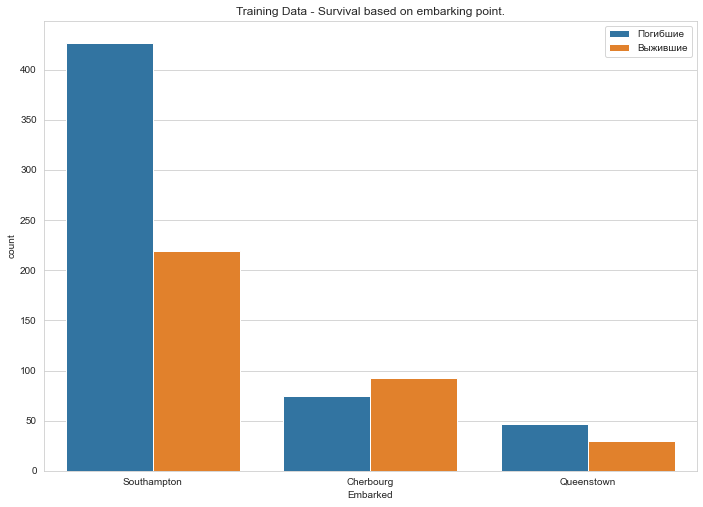

In [319]:

p = sns.countplot(x = "Embarked", hue = "Survived", data =titanic)
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Погибшие", "Выжившие"])
p.set_title("Training Data - Survival based on embarking point.")

Text(0, 0.5, 'Возраст')

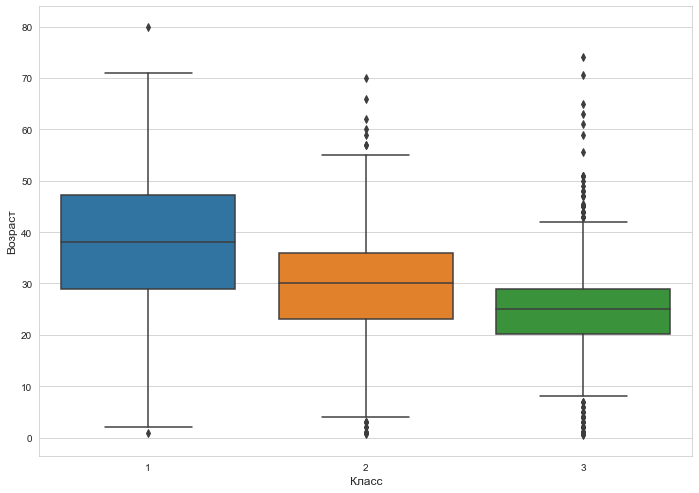

In [320]:
bp = sns.boxplot(x="Pclass", y="Age", data=titanic)
bp.set_xlabel("Класс", fontsize=12)
bp.set_ylabel("Возраст", fontsize=12)

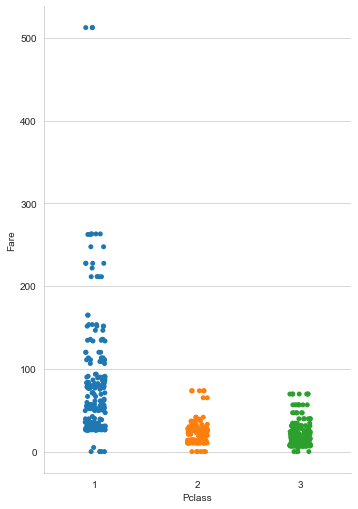

In [321]:
sns.catplot(data=titanic,x="Pclass",y="Fare", height=7, aspect=.7)

In [322]:
top_fare = titanic[['Fare', 'Pclass', 'Cabin']].sort_values('Fare', ascending=False)
top_fare.head()

,Fare,Pclass,Cabin
258,512.3292,1,no_info
737,512.3292,1,B101
679,512.3292,1,B51 B53 B55
88,263.0000,1,C23 C25 C27
27,263.0000,1,C23 C25 C27


In [323]:
top_fare.style.bar(subset=['Pclass', 'Fare'])

,Fare,Pclass,Cabin
258,512.329200,1,no_info
737,512.329200,1,B101
679,512.329200,1,B51 B53 B55
88,263.000000,1,C23 C25 C27
27,263.000000,1,C23 C25 C27
341,263.000000,1,C23 C25 C27
438,263.000000,1,C23 C25 C27
311,262.375000,1,B57 B59 B63 B66
742,262.375000,1,B57 B59 B63 B66
118,247.520800,1,B58 B60


<AxesSubplot:title={'center':'Распределение оценок'}>

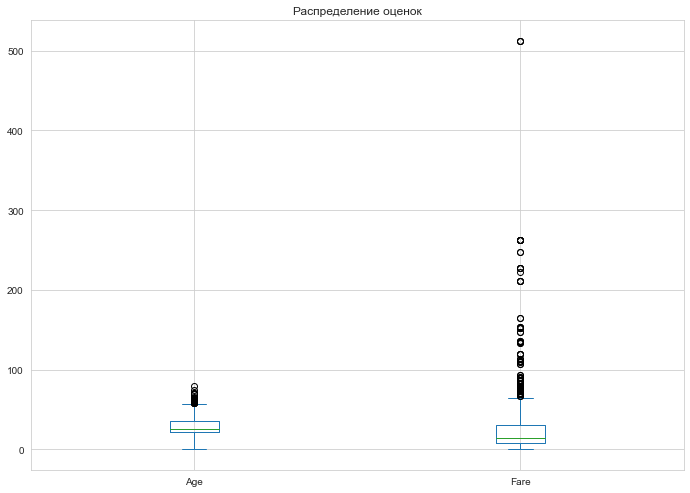

In [324]:
titanic[['Age', 'Fare']].plot(kind='box',
                                        title='Распределение оценок', grid=True)

<AxesSubplot:>

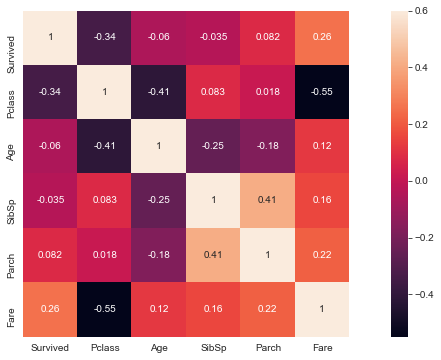

In [325]:
plt.figure(figsize=(15,6))
sns.heatmap(titanic.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

In [371]:
ax = titanic.loc[:, ['Sex', 'Survived','Age']]
ax.loc[(titanic.Sex=='female') & (titanic.Survived==1)]
# ---------------------------------------------------

# temp2 = df[~df["Def"] & (df["days since"] > 7) & (df["bin"] == 3)]
ab = titanic[(titanic['Sex']=='female') & (titanic['Survived']==1)]
ab = ab[['Sex', 'Survived','Age']]

print(ab.head(10))
# ab = aa.loc[]


# ax.head(10)
# sns.distplot(ax, label='Survived', 
#                   kde=False, ax=axes[0])


       Sex  Survived   Age
1   female         1  38.0
2   female         1  26.0
3   female         1  35.0
8   female         1  27.0
9   female         1  14.0
10  female         1   4.0
11  female         1  58.0
15  female         1  55.0
19  female         1  21.5
22  female         1  15.0


Text(0.5, 1.0, 'Male')

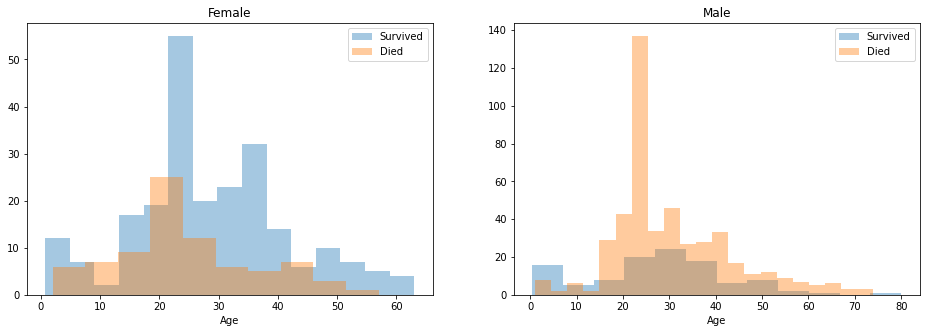

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 5))

ax = sns.distplot(titanic[(titanic.Sex=='female') & (titanic.Survived==1)]['Age'], label='Survived', 
                  kde=False, ax=axes[0])
ax = sns.distplot(titanic[(titanic.Sex=='female') & (titanic.Survived==0)]['Age'], label='Died',
                  kde=False, ax=axes[0])
ax.legend()
ax.set_title("Female")
mx = sns.distplot(titanic[(titanic.Sex=='male') & (titanic.Survived==1)]['Age'],label='Survived',
            kde=False, ax=axes[1])
mx = sns.distplot(titanic[(titanic.Sex=='male') & (titanic.Survived==0)]['Age'],label='Died',
            kde=False, ax=axes[1])
mx.legend()
mx.set_title("Male")

In [43]:
# titanic[titanic.Sex=='female'][titanic.Survived==1].apply(lambda a: True if '1' in a else True if '0' in a else False)['Age'].head()
titanic[(titanic.Sex=='female') & (titanic.Survived==1)]['Age'].head()


1    38.0
2    26.0
3    35.0
8    27.0
9    14.0
Name: Age, dtype: float64

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.